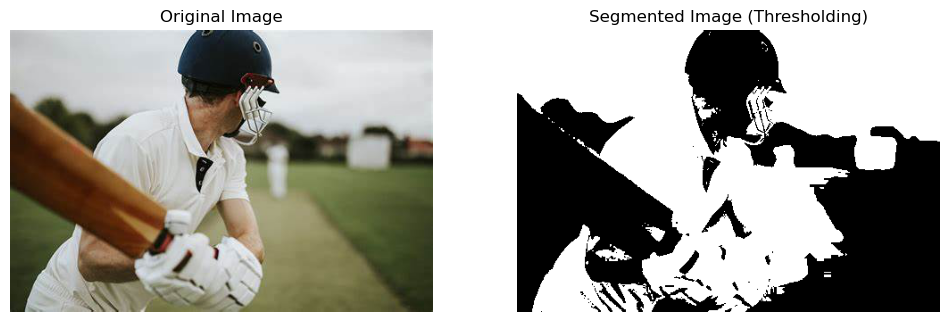

In [2]:
import numpy as np
import cv2
from matplotlib import pyplot as plt

def threshold_segmentation(image, threshold_value=127):
    if len(image.shape) == 3:
        grayscale_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    else:
        grayscale_image = image

    _, segmented_image = cv2.threshold(grayscale_image, threshold_value, 255, cv2.THRESH_BINARY)
    
    return segmented_image

def show_segmented_image(original_image, segmented_image):
    """Displays the original and segmented images side by side."""
    
    plt.figure(figsize=(12, 6))
    
    plt.subplot(1, 2, 1)
    plt.imshow(cv2.cvtColor(original_image, cv2.COLOR_BGR2RGB))
    plt.title('Original Image')
    plt.axis('off')

    plt.subplot(1, 2, 2)
    plt.imshow(segmented_image, cmap='gray')
    plt.title('Segmented Image (Thresholding)')
    plt.axis('off')
    
    plt.show()

# Load the image
image_path = r'C:\Users\srima\Downloads\cric.jpeg'
image = cv2.imread(image_path)

if image is None:
    print(f"Error: Image not found at {image_path}")
    exit()

# Apply threshold segmentation
threshold_value = 127  # Adjust if necessary
segmented_image = threshold_segmentation(image, threshold_value)

# Show the result
show_segmented_image(image, segmented_image)


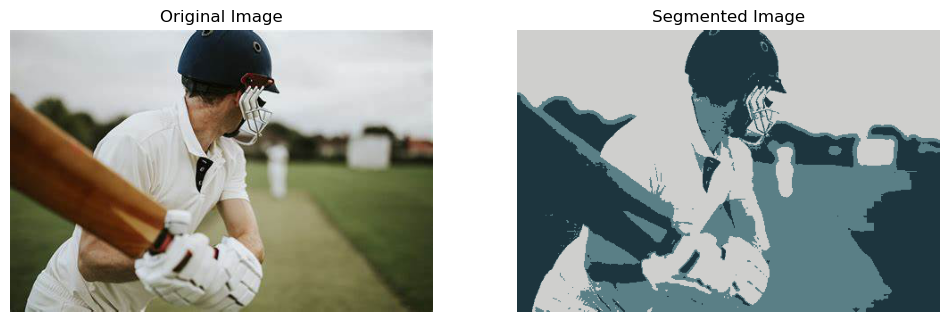

In [4]:
import numpy as np
import cv2
from matplotlib import pyplot as plt

def kmeans_segmentation(image, k=7, attempts=10):
    pixels = image.reshape((-1, 3)).astype(np.float32)

    criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 100, 0.2)
    
    ret, labels, centers = cv2.kmeans(pixels, k, None, criteria, attempts, cv2.KMEANS_RANDOM_CENTERS)

    centers = np.uint8(centers)

    segmented_image = centers[labels.flatten()]
    segmented_image = segmented_image.reshape(image.shape)
    
    return segmented_image, labels

def show_segmented_image(original_image, segmented_image):
    plt.figure(figsize=(12, 6))
    
    plt.subplot(1, 2, 1)
    plt.imshow(original_image)
    plt.title('Original Image')
    plt.axis('off')

    plt.subplot(1, 2, 2)
    plt.imshow(cv2.cvtColor(segmented_image, cv2.COLOR_BGR2RGB))
    plt.title('Segmented Image')
    plt.axis('off')
    
    plt.show()

image = cv2.imread(r'C:\Users\srima\Downloads\cric.jpeg')

if image is None:
    print("Image not found")
    exit()

image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

segmented_image, labels = kmeans_segmentation(image_rgb, k=3)

show_segmented_image(image_rgb, segmented_image)



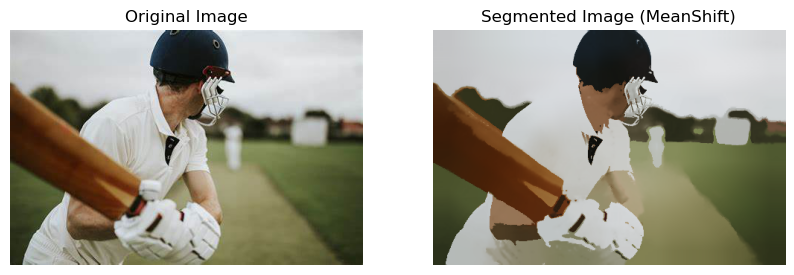

In [5]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

image = cv2.imread(r'C:\Users\srima\Downloads\cric.jpeg')

image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

segmented_image = cv2.pyrMeanShiftFiltering(image, sp=21, sr=51, maxLevel=1)

segmented_image_rgb = cv2.cvtColor(segmented_image, cv2.COLOR_BGR2RGB)

plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.title('Original Image')
plt.imshow(image_rgb)
plt.axis('off')

plt.subplot(1, 2, 2)
plt.title('Segmented Image (MeanShift)')
plt.imshow(segmented_image_rgb)
plt.axis('off')

plt.show()



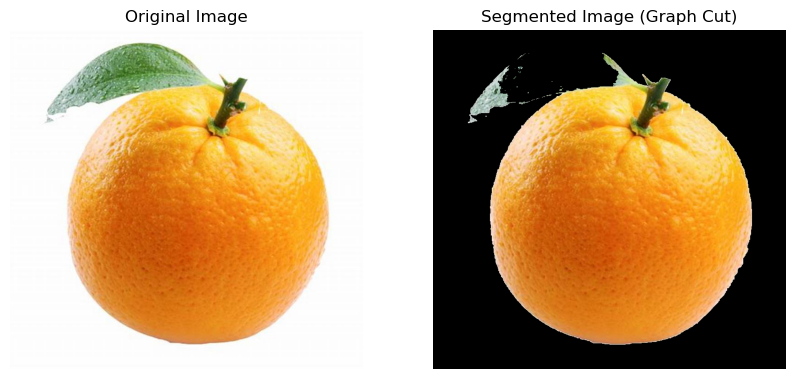

In [10]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

image = cv2.imread(r"C:\Users\srima\Downloads\org.jpeg")

image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

mask = np.zeros(image.shape[:2], np.uint8)

bgd_model = np.zeros((1, 65), np.float64)
fgd_model = np.zeros((1, 65), np.float64)

rect = (50, 50, image.shape[1]-50, image.shape[0]-50)

cv2.grabCut(image, mask, rect, bgd_model, fgd_model, 5, cv2.GC_INIT_WITH_RECT)

mask2 = np.where((mask == 2) | (mask == 0), 0, 1).astype('uint8')

segmented_image = image * mask2[:, :, np.newaxis]

segmented_image_rgb = cv2.cvtColor(segmented_image, cv2.COLOR_BGR2RGB)

plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.title('Original Image')
plt.imshow(image_rgb)
plt.axis('off')

plt.subplot(1, 2, 2)
plt.title('Segmented Image (Graph Cut)')
plt.imshow(segmented_image_rgb)
plt.axis('off')

plt.show()



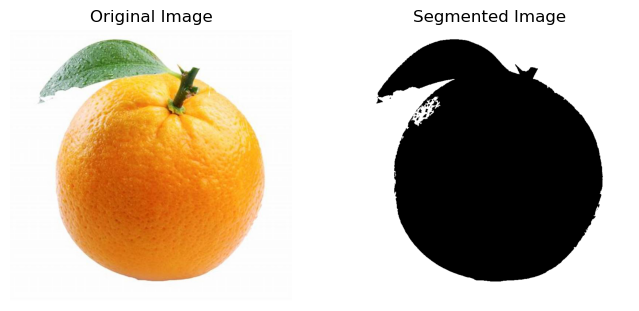

In [9]:
import numpy as np
import cv2
from matplotlib import pyplot as plt

def region_growing(image, seed, threshold=30):

    if len(image.shape) == 3:
        image_gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    else:
        image_gray = image.copy()

    segmented_image = np.zeros_like(image_gray, dtype=np.uint8)
    
    stack = [seed]
    
    seed_intensity = image_gray[seed]
    
    neighbors = [(-1, 0), (1, 0), (0, -1), (0, 1)]
    
    while stack:
        x, y = stack.pop()
        
        if segmented_image[x, y] == 255:
            continue
        
        segmented_image[x, y] = 255
        
        for dx, dy in neighbors:
            nx, ny = x + dx, y + dy
            
            if 0 <= nx < image_gray.shape[0] and 0 <= ny < image_gray.shape[1]:
                if segmented_image[nx, ny] == 0 and abs(int(image_gray[nx, ny]) - int(seed_intensity)) < threshold:
                    stack.append((nx, ny))
                    
    return segmented_image

image = cv2.imread(r"C:\Users\srima\Downloads\org.jpeg")

if image is None:
    print("Image not found")
    exit()

seed_point = (100, 100)  

segmented_image = region_growing(image, seed_point, threshold=30)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.title("Original Image")
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.axis("off")

plt.subplot(1, 2, 2)
plt.title("Segmented Image")
plt.imshow(segmented_image, cmap='gray')
plt.axis("off")

plt.show()
